# EDA2 - CustomerID의 NaN 제거

## 라이브러리 호출

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#한글폰트 가져오기
from matplotlib import rc
rc('font', family='NanumGothic')

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기

In [2]:
df = pd.read_excel('./Online Retail.xlsx')
df_origin = df.copy()

### CustomerID가 결측치인 행 삭제

In [3]:
#주문 하나에 무조건 한 종류의 아이디만 존재(결측치는 결측치만)
df_origin[~df_origin.loc[:,['CustomerID','InvoiceNo']].duplicated()].loc[:,['CustomerID','InvoiceNo']].fillna(0).groupby('InvoiceNo').count().sort_values(by='CustomerID')

,CustomerID
InvoiceNo,
536365,1
571931,1
571930,1
571929,1
571926,1
...,...
554105,1
554104,1
554103,1


In [4]:
df = df[~df['CustomerID'].isna()]
df['CustomerID'].isna().sum()
df = df.reset_index(drop=True)

## 기본정보 확인

In [5]:
print(df.shape)
print(df.info())
df.describe()

(406829, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB
None


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [6]:
df.isna().sum() #description 결측치도 다 날아감

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## CustomerID NaN 제거한 상태, EDA 진행
InovoiceNo와 StockCode는 수치형 변수이지만, 문자가 껴있는것으로 보임. -> 처리 필요
<br>InvoiceDate는 날짜니 패스
<br>Description, Quantity, UnitPrice, CustomerID, Country 확인

### InvoiceNo
6자리 숫자, C로 시작하는건 취소된 건 -> **Cancel이라는 변수 생성** 후, C로 시작하는 값은 1로 표현 + InvoiceNo의 C 삭제

In [7]:
#주문 수는 25900개 -> 22190개
len(df['InvoiceNo'].unique())

22190

In [8]:
#C로 시작하는 행 위치 저장
df_cancel = df[df['InvoiceNo'].str.startswith('C')==True]

#C로 시작하는지 여부를 Cancel이라는 변수에 저장
df['Cancel'] = 0
df['Cancel'].iloc[df_cancel.index] = 1

#C로 시작하는 값들에서 C를 삭제
df['InvoiceNo'].iloc[df_cancel.index] = df['InvoiceNo'].iloc[df_cancel.index].str[1:]
display(df[df['Cancel']==1])

df['Cancel'].value_counts()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
141,536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,1
154,536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,1
235,536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,1
236,536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,1
237,536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
406377,581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,1
406461,581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,1
406635,581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,1
406636,581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,1


Cancel
0    397924
1      8905
Name: count, dtype: int64

In [9]:
print('InvoiceNo 중 문자열 값의 수:', pd.to_numeric(df['InvoiceNo'], errors='coerce').isna().sum())
df['InvoiceNo'] = df['InvoiceNo'].astype(int) # 타입으로 바꾸기

InvoiceNo 중 문자열 값의 수: 0


### StockCode
5자리 숫자
<br> 1자리 문자, (5자리수+1자리문자)형태도 존재

In [10]:
len(df['StockCode'].unique())

3684

In [11]:
df['StockCode'].astype(str).str.len().value_counts() # 훨씬 간결해짐(8,9자리가 없어짐) 1~7자리, 12자리

StockCode
5     371020
6      33593
4       1216
1        542
7        296
2        134
3         16
12        12
Name: count, dtype: int64

#### 1자리

In [12]:
df['StockCode'] = df['StockCode'].astype(str)
print(df[df['StockCode'].str.len() ==1]['StockCode'].value_counts())

StockCode
M    465
D     77
Name: count, dtype: int64


In [13]:
display(df[df['StockCode'] =='M']) #관리자 데이터

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
1698,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom,0
1709,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom,0
4707,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom,0
5686,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom,0
6240,537137,M,Manual,36,2010-12-05 12:43:00,0.85,16327.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
400575,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom,0
401593,581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom,1
402602,581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom,1
404897,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom,0


In [14]:
df[df['StockCode'] =='D'] #할인해준 경우로 추측

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
141,536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,1
6748,537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom,1
10234,537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom,1
12760,537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom,1
20712,538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
361537,577227,D,Discount,-1,2011-11-18 12:06:00,19.82,14527.0,United Kingdom,1
361538,577227,D,Discount,-1,2011-11-18 12:06:00,16.76,14527.0,United Kingdom,1
372543,578239,D,Discount,-1,2011-11-23 12:29:00,26.33,14912.0,Italy,1
389005,579884,D,Discount,-1,2011-11-30 17:34:00,20.53,14527.0,United Kingdom,1


#### 2자리

In [15]:
print(df[df['StockCode'].str.len() == 2]['StockCode'].value_counts())
display(df[df['StockCode'] =='C2']) 

#특징파악
print(df[df['StockCode'] =='C2']['Quantity'].value_counts())
print('\n',df[df['StockCode'] =='C2']['UnitPrice'].value_counts())
print('\nID 수:',len(df[df['StockCode'] =='C2']['CustomerID'].value_counts()),'\n')
print(df[df['StockCode'] =='C2']['Country'].value_counts())

StockCode
C2    134
Name: count, dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
1422,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.0,14911.0,EIRE,0
8614,537368,C2,CARRIAGE,1,2010-12-06 12:40:00,50.0,14911.0,EIRE,0
8947,537378,C2,CARRIAGE,1,2010-12-06 13:06:00,50.0,14911.0,EIRE,0
13324,537963,C2,CARRIAGE,1,2010-12-09 11:30:00,50.0,13369.0,United Kingdom,0
13363,538002,C2,CARRIAGE,1,2010-12-09 11:48:00,50.0,14932.0,Channel Islands,0
...,...,...,...,...,...,...,...,...,...
387240,579539,C2,CARRIAGE,1,2011-11-30 10:06:00,50.0,14911.0,EIRE,0
388625,579768,C2,CARRIAGE,1,2011-11-30 15:08:00,50.0,14911.0,EIRE,0
389253,579910,C2,CARRIAGE,1,2011-12-01 08:52:00,50.0,14911.0,EIRE,0
391014,580127,C2,CARRIAGE,1,2011-12-01 17:51:00,50.0,14911.0,EIRE,0


Quantity
 1    132
-1      1
 2      1
Name: count, dtype: int64

 UnitPrice
50.0     130
25.0       2
150.0      1
18.0       1
Name: count, dtype: int64

ID 수: 29 

Country
EIRE               99
United Kingdom     30
Channel Islands     3
France              2
Name: count, dtype: int64


In [16]:
display(df[(df['StockCode'] =='C2')& (df['Quantity'] == -1)]) #EIRE는 아일랜드
display(df[(df['StockCode'] =='C2')& (df['Quantity'] == 2)]) #여기도 프랑스네

display(df[(df['StockCode'] =='C2')& (df['UnitPrice'] == 25.0)])
display(df[(df['StockCode'] =='C2')& (df['UnitPrice'] == 150.0)]) #프랑스
display(df[(df['StockCode'] =='C2')& (df['UnitPrice'] == 18.0)]) #프랑스 => 프랑스 두개 다 뜸

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
27953,540164,C2,CARRIAGE,-1,2011-01-05 12:02:00,50.0,14911.0,EIRE,1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
146343,554826,C2,CARRIAGE,2,2011-05-26 14:53:00,18.0,12493.0,France,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
164060,556969,C2,CARRIAGE,1,2011-06-16 10:11:00,25.0,16257.0,United Kingdom,0
168823,557605,C2,CARRIAGE,1,2011-06-21 12:06:00,25.0,14911.0,EIRE,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
25993,539688,C2,CARRIAGE,1,2010-12-21 11:00:00,150.0,12678.0,France,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
146343,554826,C2,CARRIAGE,2,2011-05-26 14:53:00,18.0,12493.0,France,0


#### 3자리

In [17]:
print(df[df['StockCode'].str.len() == 3]['StockCode'].value_counts())
display(df[df['StockCode'] =='DOT']) #DOTCOM POSTAGE : 우편요금

StockCode
DOT    16
Name: count, dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
230911,564764,DOT,DOTCOM POSTAGE,1,2011-08-30 10:49:00,11.17,14096.0,United Kingdom,0
234331,565383,DOT,DOTCOM POSTAGE,1,2011-09-02 15:45:00,16.46,14096.0,United Kingdom,0
242017,566217,DOT,DOTCOM POSTAGE,1,2011-09-09 15:17:00,13.16,14096.0,United Kingdom,0
246634,566566,DOT,DOTCOM POSTAGE,1,2011-09-13 12:32:00,85.58,14096.0,United Kingdom,0
256658,567656,DOT,DOTCOM POSTAGE,1,2011-09-21 14:40:00,878.55,14096.0,United Kingdom,0
265352,568346,DOT,DOTCOM POSTAGE,1,2011-09-26 15:28:00,688.08,14096.0,United Kingdom,0
274704,569246,DOT,DOTCOM POSTAGE,1,2011-10-03 09:57:00,490.25,14096.0,United Kingdom,0
289258,570488,DOT,DOTCOM POSTAGE,1,2011-10-10 17:12:00,635.01,14096.0,United Kingdom,0
299012,571441,DOT,DOTCOM POSTAGE,1,2011-10-17 13:31:00,743.62,14096.0,United Kingdom,0
311236,572552,DOT,DOTCOM POSTAGE,1,2011-10-24 17:07:00,638.30,14096.0,United Kingdom,0


#### 4자리

In [19]:
print(df[df['StockCode'].str.len() == 4]['StockCode'].value_counts())
display(df[df['StockCode'] =='POST']) #POSTAGE: 우편요금
display(df[df['StockCode'] =='CRUK']) #CustomerID가 한종류임, 모두 Cancel, 14096.0 / CRUK(Cancer Research UK) Commission: 영국 암 연구 위원회
display(df[df['StockCode'] =='PADS']) 

StockCode
POST    1196
CRUK      16
PADS       4
Name: count, dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0,France,0
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791.0,Netherlands,0
1122,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662.0,Germany,0
3868,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738.0,Germany,0
4053,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686.0,France,0
...,...,...,...,...,...,...,...,...,...
406395,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.0,12423.0,Belgium,0
406413,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518.0,Germany,0
406650,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662.0,Germany,0
406687,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526.0,Germany,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
230912,564763,CRUK,CRUK Commission,-1,2011-08-30 10:49:00,1.60,14096.0,United Kingdom,1
234352,565382,CRUK,CRUK Commission,-1,2011-09-02 15:45:00,13.01,14096.0,United Kingdom,1
242041,566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096.0,United Kingdom,1
246653,566565,CRUK,CRUK Commission,-1,2011-09-13 12:32:00,52.24,14096.0,United Kingdom,1
257062,567655,CRUK,CRUK Commission,-1,2011-09-21 14:40:00,608.66,14096.0,United Kingdom,1
265371,568345,CRUK,CRUK Commission,-1,2011-09-26 15:28:00,447.56,14096.0,United Kingdom,1
274723,569245,CRUK,CRUK Commission,-1,2011-10-03 09:57:00,361.59,14096.0,United Kingdom,1
289277,570487,CRUK,CRUK Commission,-1,2011-10-10 17:12:00,411.92,14096.0,United Kingdom,1
299013,571440,CRUK,CRUK Commission,-1,2011-10-17 13:31:00,495.98,14096.0,United Kingdom,1
311237,572551,CRUK,CRUK Commission,-1,2011-10-24 17:07:00,425.14,14096.0,United Kingdom,1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
110121,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,0
199246,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,0
262429,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.000,16133.0,United Kingdom,0
263645,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,0


##### POST

In [20]:
Post_price = df[df['StockCode'] =='POST'].loc[:,['Country','UnitPrice']]
display(Post_price[~Post_price.duplicated()])
Post_price[~Post_price.duplicated()].groupby('Country').count().sort_values(by = 'UnitPrice',ascending=False)

,Country,UnitPrice
45,France,18.00
386,Netherlands,15.00
1122,Germany,18.00
4120,Switzerland,40.00
4903,Portugal,28.00
...,...,...
378085,United Kingdom,7.60
381536,United Kingdom,7.00
384880,United Kingdom,9.72
397965,France,17.00


,UnitPrice
Country,
United Kingdom,52
France,8
Italy,5
Portugal,4
Norway,4
Belgium,3
Sweden,3
Germany,3
Switzerland,2


##### PADS
PADS TO MATCH ALL CUSHIONS: 모든 쿠션에 맞는 패드 -> 베개 커버로 추정
<br>550193 561226 568158 568200

In [21]:
df[df['InvoiceNo'] == 561226]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
199235,561226,22596,CHRISTMAS STAR WISH LIST CHALKBOARD,12,2011-07-26 10:13:00,1.250,15618.0,United Kingdom,0
199236,561226,23131,MISTLETOE HEART WREATH CREAM,4,2011-07-26 10:13:00,4.150,15618.0,United Kingdom,0
199237,561226,22158,3 HEARTS HANGING DECORATION RUSTIC,8,2011-07-26 10:13:00,2.950,15618.0,United Kingdom,0
199238,561226,23132,SMALL IVORY HEART WALL ORGANISER,3,2011-07-26 10:13:00,5.750,15618.0,United Kingdom,0
199239,561226,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2011-07-26 10:13:00,1.690,15618.0,United Kingdom,0
199240,561226,21136,PAINTED METAL PEARS ASSORTED,16,2011-07-26 10:13:00,1.690,15618.0,United Kingdom,0
199241,561226,72760B,VINTAGE CREAM 3 BASKET CAKE STAND,2,2011-07-26 10:13:00,9.950,15618.0,United Kingdom,0
199242,561226,22171,3 HOOK PHOTO SHELF ANTIQUE WHITE,2,2011-07-26 10:13:00,8.500,15618.0,United Kingdom,0
199243,561226,22077,6 RIBBONS RUSTIC CHARM,12,2011-07-26 10:13:00,1.650,15618.0,United Kingdom,0
199244,561226,23300,GARDENERS KNEELING PAD CUP OF TEA,12,2011-07-26 10:13:00,1.650,15618.0,United Kingdom,0


#### 14096.0

In [22]:
print(df[df['CustomerID'] == 14096.0]['InvoiceNo'].value_counts())
print('\n1개만 구입한 주문의 수:',(df[df['CustomerID'] == 14096.0]['InvoiceNo'].value_counts() == 1).sum())

InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
567656    421
575607    377
571441    364
570488    353
572552    352
568346    335
569246    285
566566     70
566217     34
565383     19
572854     14
564764      6
564763      1
566565      1
565382      1
579195      1
566187      1
578269      1
566216      1
576338      1
575606      1
571440      1
567655      1
573575      1
568345      1
569245      1
572551      1
570487      1
580726      1
Name: count, dtype: int64

1개만 구입한 주문의 수: 17


In [23]:
print(df[df['CustomerID'] == 14096.0]['Cancel'].value_counts())
print('취소한 건의 종류 수:',len(df[(df['CustomerID'] == 14096.0) & (df['Cancel'] == 1)]['InvoiceNo'].unique()))

#1개만 주문한 건은 다 취소함
df[(df['CustomerID'] == 14096.0) & (df['Cancel'] == 1)]

Cancel
0    5111
1      17
Name: count, dtype: int64
취소한 건의 종류 수: 17


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
230912,564763,CRUK,CRUK Commission,-1,2011-08-30 10:49:00,1.60,14096.0,United Kingdom,1
234352,565382,CRUK,CRUK Commission,-1,2011-09-02 15:45:00,13.01,14096.0,United Kingdom,1
241464,566187,M,Manual,-1,2011-09-09 13:03:00,110.45,14096.0,United Kingdom,1
242041,566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096.0,United Kingdom,1
246653,566565,CRUK,CRUK Commission,-1,2011-09-13 12:32:00,52.24,14096.0,United Kingdom,1
257062,567655,CRUK,CRUK Commission,-1,2011-09-21 14:40:00,608.66,14096.0,United Kingdom,1
265371,568345,CRUK,CRUK Commission,-1,2011-09-26 15:28:00,447.56,14096.0,United Kingdom,1
274723,569245,CRUK,CRUK Commission,-1,2011-10-03 09:57:00,361.59,14096.0,United Kingdom,1
289277,570487,CRUK,CRUK Commission,-1,2011-10-10 17:12:00,411.92,14096.0,United Kingdom,1
299013,571440,CRUK,CRUK Commission,-1,2011-10-17 13:31:00,495.98,14096.0,United Kingdom,1


In [24]:
print(list(df[df['StockCode'] == 'CRUK']['InvoiceNo'] +1) == list(df[df['StockCode']=='DOT']['InvoiceNo'])) #주문이 연속적임. ㄷㄷ
df[(df['StockCode'] == 'CRUK') | (df['StockCode']=='DOT')] #뭐 어쨌든 필요한 정보는 아닌 듯

True


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
230911,564764,DOT,DOTCOM POSTAGE,1,2011-08-30 10:49:00,11.17,14096.0,United Kingdom,0
230912,564763,CRUK,CRUK Commission,-1,2011-08-30 10:49:00,1.60,14096.0,United Kingdom,1
234331,565383,DOT,DOTCOM POSTAGE,1,2011-09-02 15:45:00,16.46,14096.0,United Kingdom,0
234352,565382,CRUK,CRUK Commission,-1,2011-09-02 15:45:00,13.01,14096.0,United Kingdom,1
242017,566217,DOT,DOTCOM POSTAGE,1,2011-09-09 15:17:00,13.16,14096.0,United Kingdom,0
242041,566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096.0,United Kingdom,1
246634,566566,DOT,DOTCOM POSTAGE,1,2011-09-13 12:32:00,85.58,14096.0,United Kingdom,0
246653,566565,CRUK,CRUK Commission,-1,2011-09-13 12:32:00,52.24,14096.0,United Kingdom,1
256658,567656,DOT,DOTCOM POSTAGE,1,2011-09-21 14:40:00,878.55,14096.0,United Kingdom,0
257062,567655,CRUK,CRUK Commission,-1,2011-09-21 14:40:00,608.66,14096.0,United Kingdom,1


In [117]:
df[df['InvoiceNo'] == 564764]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
230906,564764,16207B,PINK HEART RED HANDBAG,1,2011-08-30 10:49:00,2.46,14096.0,United Kingdom,0
230907,564764,16225,RATTLE SNAKE EGGS,1,2011-08-30 10:49:00,3.29,14096.0,United Kingdom,0
230908,564764,16254,TRANSPARENT ACRYLIC TAPE DISPENSER,1,2011-08-30 10:49:00,1.63,14096.0,United Kingdom,0
230909,564764,84249A,"GREETING CARD,SQUARE, DOUGHNUTS",1,2011-08-30 10:49:00,0.83,14096.0,United Kingdom,0
230910,564764,84659A,WHITE TRAVEL ALARM CLOCK,2,2011-08-30 10:49:00,1.23,14096.0,United Kingdom,0
230911,564764,DOT,DOTCOM POSTAGE,1,2011-08-30 10:49:00,11.17,14096.0,United Kingdom,0


#### 5자리

In [25]:
#전부 정수형인지만 확인 -> 오류없음 
df[df['StockCode'].astype(str).str.len() == 5]['StockCode'].astype(int)

1         71053
5         22752
6         21730
7         22633
8         22632
          ...  
406824    22613
406825    22899
406826    23254
406827    23255
406828    22138
Name: StockCode, Length: 371020, dtype: int32

In [26]:
len(df[df['StockCode'].astype(str).str.len() == 5]['StockCode'].unique())

2798

#### 6자리

In [27]:
print(df[df['StockCode'].str.len() == 6]['StockCode'])

#오류가 안나는 것으로 보아 모두 문자열 숫자 5개 + 알파벳 1개로 이루어진 것으로 판단
print(df[df['StockCode'].str.len() == 6]['StockCode'].str[:-1].astype(int))

#종류 수 확인
print('개별 종류 수:', len(df[df['StockCode'].str.len() == 6]['StockCode'].unique()))
print('숫자 종류 수:',len(df[df['StockCode'].str.len() == 6]['StockCode'].str[:-1].astype(int).unique()))
print('알파벳 종류 수:',len(df[df['StockCode'].str.len() == 6]['StockCode'].str[-1:].unique())) #알파벳은 총 26종류(그 중 24종류)

0         85123A
2         84406B
3         84029G
4         84029E
49        85123A
           ...  
406698    84997C
406729    85099C
406758    84993A
406764    85049A
406773    85049E
Name: StockCode, Length: 33593, dtype: object
0         85123
2         84406
3         84029
4         84029
49        85123
          ...  
406698    84997
406729    85099
406758    84993
406764    85049
406773    85049
Name: StockCode, Length: 33593, dtype: int32
개별 종류 수: 877
숫자 종류 수: 411
알파벳 종류 수: 24


In [28]:
#알파벳별 갯수
pd.Series(df[df['StockCode'].str.len() == 6]['StockCode'].unique()).str[-1:].value_counts() #B가 제일 많네..? 아 Q,X가 없음

B    260
A    235
C    136
D     79
E     32
F     23
P     18
G     16
L     14
S     14
M      9
J      6
K      5
N      5
H      4
V      4
W      4
U      4
R      3
T      2
Y      1
I      1
O      1
Z      1
Name: count, dtype: int64

In [29]:
#5자리 숫자당 종류 수 
StockC_6 = df[df['StockCode'].str.len() == 6]['StockCode']
StockC_6_df = pd.concat([StockC_6.str[:-1].astype(int),StockC_6],axis=1)
StockC_6_df.columns = ['StockCode5','StockCode6']

apb_count = StockC_6_df[~StockC_6_df.duplicated()].groupby('StockCode5').count() 
display(apb_count.sort_values('StockCode6',ascending=False))
apb_count.value_counts()

,StockCode6
StockCode5,
90214,24
85049,8
17012,6
90036,6
90059,6
...,...
72024,1
85018,1
71406,1


StockCode6
1             156
2             144
3              60
4              31
5              11
6               7
8               1
24              1
Name: count, dtype: int64

##### 6자리의 숫자와 5자리의 교집합
알파벳이 붙은 애들의 숫자는 다 알파벳이 붙어있는지 => 1개 빼고

In [30]:
# 6자리 StockCode의 숫자와 5자리 StockCode의 교집합
print(set(df[df['StockCode'].astype(str).str.len() == 5]['StockCode'].astype(int).unique()).intersection(set(df[df['StockCode'].str.len() == 6]['StockCode'].str[:-1].astype(int).unique())))
display(df[df['StockCode'].astype(str).str.startswith('47566')])
df[df['StockCode'].astype(str).str.startswith('47566')]['StockCode'].unique()

{47566}


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
2474,536638,47566B,TEA TIME PARTY BUNTING,5,2010-12-02 11:41:00,4.65,16244.0,United Kingdom,0
4481,536956,47566,PARTY BUNTING,5,2010-12-03 12:43:00,4.65,14210.0,United Kingdom,0
5614,537065,47566,PARTY BUNTING,5,2010-12-05 11:57:00,4.65,12567.0,France,0
5896,537128,47566,PARTY BUNTING,2,2010-12-05 12:15:00,4.65,12841.0,United Kingdom,0
6388,537142,47566,PARTY BUNTING,1,2010-12-05 12:57:00,4.65,12748.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
400525,580937,47566,PARTY BUNTING,4,2011-12-06 14:13:00,4.95,16143.0,United Kingdom,0
402557,581142,47566,PARTY BUNTING,3,2011-12-07 13:38:00,4.95,14204.0,United Kingdom,0
404360,581345,47566,PARTY BUNTING,5,2011-12-08 12:15:00,4.95,17315.0,United Kingdom,0
405398,581417,47566,PARTY BUNTING,8,2011-12-08 15:01:00,4.95,13013.0,United Kingdom,0


array(['47566B', '47566'], dtype=object)

PARTY BUNTING ////////////// TEA TIME PARTY BUNTING
<br>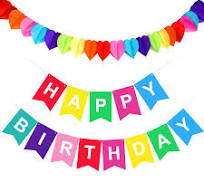
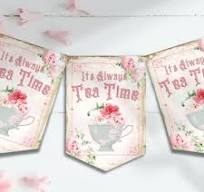


##### 24종류

In [31]:
display(apb_count[apb_count['StockCode6']==24])

display(df[df['StockCode'].str.startswith('90214')])
print(df[(df['StockCode'].str.startswith('90214')) & (df['Description'].str.startswith('LETTER'))].shape)
df[(df['StockCode'].str.len() == 6) & (df['Description'].str.startswith('LETTER'))]['StockCode'].str[:-1].unique()
#알파벳 키링

,StockCode6
StockCode5,
90214,24


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
1881,536591,90214M,"LETTER ""M"" BLING KEY RING",1,2010-12-01 16:57:00,1.25,14606.0,United Kingdom,0
1882,536591,90214V,"LETTER ""V"" BLING KEY RING",1,2010-12-01 16:57:00,1.25,14606.0,United Kingdom,0
1883,536591,90214S,"LETTER ""S"" BLING KEY RING",1,2010-12-01 16:57:00,1.25,14606.0,United Kingdom,0
1884,536591,90214J,"LETTER ""J"" BLING KEY RING",2,2010-12-01 16:57:00,1.25,14606.0,United Kingdom,0
11467,537765,90214S,"LETTER ""S"" BLING KEY RING",2,2010-12-08 12:08:00,1.25,14606.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
404933,581405,90214I,"LETTER ""I"" BLING KEY RING",1,2011-12-08 13:50:00,0.29,13521.0,United Kingdom,0
405365,581414,90214R,"LETTER ""R"" BLING KEY RING",1,2011-12-08 14:39:00,0.29,14730.0,United Kingdom,0
405568,581425,90214K,"LETTER ""K"" BLING KEY RING",1,2011-12-08 15:31:00,0.29,14796.0,United Kingdom,0
405569,581425,90214N,"LETTER ""N"" BLING KEY RING",1,2011-12-08 15:31:00,0.29,14796.0,United Kingdom,0


(117, 9)


array(['90214'], dtype=object)

##### 8종류

In [32]:
display(apb_count[apb_count['StockCode6']==8])
display(df[df['StockCode'].astype(str).str.startswith('85049')])
np.sort(df[df['StockCode'].astype(str).str.startswith('85049')]['StockCode'].str[-1].unique()) #A~H

,StockCode6
StockCode5,
85049,8


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
172,536385,85049A,TRADITIONAL CHRISTMAS RIBBONS,12,2010-12-01 09:56:00,1.25,17420.0,United Kingdom,0
325,536401,85049E,SCANDINAVIAN REDS RIBBONS,2,2010-12-01 11:21:00,1.25,15862.0,United Kingdom,0
396,536404,85049C,ROMANTIC PINKS RIBBONS,12,2010-12-01 11:29:00,1.25,16218.0,United Kingdom,0
397,536404,85049D,BRIGHT BLUES RIBBONS,12,2010-12-01 11:29:00,1.25,16218.0,United Kingdom,0
398,536404,85049E,SCANDINAVIAN REDS RIBBONS,12,2010-12-01 11:29:00,1.25,16218.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
402458,581134,85049C,ROMANTIC PINKS RIBBONS,2,2011-12-07 13:12:00,1.25,16368.0,United Kingdom,0
402466,581134,85049A,TRADITIONAL CHRISTMAS RIBBONS,5,2011-12-07 13:12:00,1.25,16368.0,United Kingdom,0
406502,581502,85049A,TRADITIONAL CHRISTMAS RIBBONS,4,2011-12-09 10:51:00,1.25,15910.0,United Kingdom,0
406764,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom,0


array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

##### 6종류

In [33]:
apb_count[apb_count['StockCode6']==6].index

Index([17012, 46776, 84596, 84968, 90036, 90059, 90129], dtype='int32', name='StockCode5')

In [34]:
display(apb_count[apb_count['StockCode6']==6])
for i in apb_count[apb_count['StockCode6']==6].index:
    print(i,np.sort(df[df['StockCode'].astype(str).str.startswith(str(i))]['StockCode'].str[-1].unique()))
display(df[df['StockCode'].astype(str).str.startswith('84596')])

,StockCode6
StockCode5,
17012,6
46776,6
84596,6
84968,6
90036,6
90059,6
90129,6


17012 ['A' 'B' 'C' 'D' 'E' 'F']
46776 ['A' 'B' 'C' 'D' 'E' 'F']
84596 ['B' 'E' 'F' 'G' 'J' 'L']
84968 ['A' 'B' 'C' 'D' 'E' 'F']
90036 ['A' 'B' 'C' 'D' 'E' 'F']
90059 ['A' 'B' 'C' 'D' 'E' 'F']
90129 ['A' 'B' 'C' 'D' 'E' 'F']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
1012,536520,84596E,SMALL LICORICE DES PINK BOWL,1,2010-12-01 12:43:00,1.25,14729.0,United Kingdom,0
5818,537126,84596E,SMALL LICORICE DES PINK BOWL,1,2010-12-05 12:13:00,1.25,18118.0,United Kingdom,0
5819,537126,84596G,SMALL CHOCOLATES PINK BOWL,1,2010-12-05 12:13:00,1.25,18118.0,United Kingdom,0
6429,537144,84596E,SMALL LICORICE DES PINK BOWL,1,2010-12-05 13:00:00,1.25,15880.0,United Kingdom,0
6430,537144,84596G,SMALL CHOCOLATES PINK BOWL,1,2010-12-05 13:00:00,1.25,15880.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
405528,581425,84596G,SMALL CHOCOLATES PINK BOWL,8,2011-12-08 15:31:00,0.42,14796.0,United Kingdom,0
405529,581425,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2011-12-08 15:31:00,0.42,14796.0,United Kingdom,0
405530,581425,84596B,SMALL DOLLY MIX DESIGN ORANGE BOWL,8,2011-12-08 15:31:00,0.42,14796.0,United Kingdom,0
406272,581476,84596F,SMALL MARSHMALLOWS PINK BOWL,32,2011-12-09 08:48:00,0.42,12433.0,Norway,0


In [35]:
for i in [84594,84595,84596,84597,84598]:
    print(i in apb_count.index)
    
for i in [84595,84596,84597]:
    print(i,np.sort(df[df['StockCode'].astype(str).str.startswith(str(i))]['StockCode'].str[-1].unique()))

False
True
True
True
False
84595 ['E']
84596 ['B' 'E' 'F' 'G' 'J' 'L']
84597 ['B' 'C']


In [36]:
df[df['StockCode'] == '84597C']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
7293,537208,84597C,RETRO PINK BALL ASHTRAY,1,2010-12-05 15:12:00,1.25,15889.0,United Kingdom,0
20211,538853,84597C,RETRO PINK BALL ASHTRAY,2,2010-12-14 13:35:00,1.25,16805.0,United Kingdom,0
44850,542258,84597C,RETRO PINK BALL ASHTRAY,1,2011-01-26 17:08:00,1.25,17372.0,United Kingdom,0
57497,543975,84597C,RETRO PINK BALL ASHTRAY,3,2011-02-14 15:23:00,1.25,17231.0,United Kingdom,0
61728,544455,84597C,RETRO PINK BALL ASHTRAY,12,2011-02-20 13:18:00,1.25,13097.0,United Kingdom,0
66423,544930,84597C,RETRO PINK BALL ASHTRAY,2,2011-02-24 18:26:00,1.25,17472.0,United Kingdom,0
72076,545574,84597C,RETRO PINK BALL ASHTRAY,2,2011-03-03 18:16:00,1.25,13959.0,United Kingdom,0
106633,549771,84597C,RETRO PINK BALL ASHTRAY,2,2011-04-12 11:43:00,1.25,14669.0,United Kingdom,0
115069,550781,84597C,RETRO PINK BALL ASHTRAY,12,2011-04-20 13:43:00,1.25,13097.0,United Kingdom,0
118779,551283,84597C,RETRO PINK BALL ASHTRAY,4,2011-04-27 14:01:00,1.25,16755.0,United Kingdom,0


##### 5종류

In [37]:
display(apb_count[apb_count['StockCode6']==5])
for i in apb_count[apb_count['StockCode6']==5].index:
    print(i,np.sort(df[df['StockCode'].astype(str).str.startswith(str(i))]['StockCode'].str[-1].unique()))

,StockCode6
StockCode5,
16169,5
17084,5
46000,5
84247,5
84509,5
85230,5
90125,5
90141,5
90176,5


16169 ['E' 'K' 'M' 'N' 'P']
17084 ['A' 'J' 'N' 'P' 'R']
46000 ['M' 'P' 'R' 'S' 'U']
84247 ['E' 'G' 'K' 'L' 'N']
84509 ['A' 'B' 'C' 'E' 'G']
85230 ['A' 'B' 'E' 'F' 'G']
90125 ['A' 'B' 'C' 'D' 'E']
90141 ['A' 'B' 'C' 'D' 'E']
90176 ['A' 'B' 'C' 'D' 'E']
90177 ['A' 'B' 'C' 'D' 'E']
90200 ['A' 'B' 'C' 'D' 'E']


#### 7자리

In [38]:
print(df[df['StockCode'].str.len() == 7]['StockCode'].value_counts())
display(df[df['StockCode'] =='15056BL']) #EDWARDIAN PARASOL BLACK: 에드워드 파라솔 블랙
df[df['StockCode'] =='15056BL']['Description'].unique()

StockCode
15056BL    296
Name: count, dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
132,536381,15056BL,EDWARDIAN PARASOL BLACK,2,2010-12-01 09:41:00,5.95,15311.0,United Kingdom,0
281,536396,15056BL,EDWARDIAN PARASOL BLACK,6,2010-12-01 10:51:00,4.95,17850.0,United Kingdom,0
1218,536531,15056BL,EDWARDIAN PARASOL BLACK,12,2010-12-01 13:23:00,5.95,15485.0,United Kingdom,0
3013,536750,15056BL,EDWARDIAN PARASOL BLACK,6,2010-12-02 14:04:00,4.95,17850.0,United Kingdom,0
3034,536752,15056BL,EDWARDIAN PARASOL BLACK,6,2010-12-02 14:06:00,4.95,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
398695,580727,15056BL,EDWARDIAN PARASOL BLACK,1,2011-12-05 17:17:00,12.46,14096.0,United Kingdom,0
400125,580893,15056BL,EDWARDIAN PARASOL BLACK,1,2011-12-06 12:38:00,5.95,17290.0,United Kingdom,0
401969,581098,15056BL,EDWARDIAN PARASOL BLACK,6,2011-12-07 11:42:00,5.95,14911.0,EIRE,0
403807,581232,15056BL,EDWARDIAN PARASOL BLACK,24,2011-12-08 10:26:00,5.95,12358.0,Austria,0


array(['EDWARDIAN PARASOL BLACK'], dtype=object)

EDWARDIAN PARASOL BLACK 
<br>EDWARDIAN이 '에드워드왕 시대의'라는 뜻으로 레이스 달린 고급스러운 느낌을 말하는듯
<br>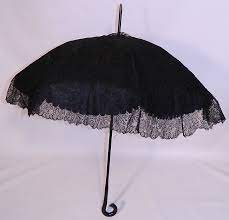

#### 12자리

In [39]:
print(df[df['StockCode'].str.len() == 12]['StockCode'].value_counts())
display(df[df['StockCode'] =='BANK CHARGES']) #재무회계쪽 데이터인듯 -> 삭제하는 방향

StockCode
BANK CHARGES    12
Name: count, dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
3219,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.000,15823.0,United Kingdom,0
38500,541505,BANK CHARGES,Bank Charges,1,2011-01-18 15:58:00,15.000,15939.0,United Kingdom,0
106006,549717,BANK CHARGES,Bank Charges,1,2011-04-11 14:56:00,15.000,14606.0,United Kingdom,0
122987,551945,BANK CHARGES,Bank Charges,1,2011-05-05 11:09:00,15.000,16714.0,United Kingdom,0
237815,565735,BANK CHARGES,Bank Charges,1,2011-09-06 12:25:00,15.000,16904.0,United Kingdom,0
265505,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,15.000,13405.0,United Kingdom,0
265506,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405.0,United Kingdom,0
303479,571900,BANK CHARGES,Bank Charges,1,2011-10-19 14:26:00,15.000,13263.0,United Kingdom,0
323417,573586,BANK CHARGES,Bank Charges,1,2011-10-31 14:48:00,15.000,14704.0,United Kingdom,0
331274,574546,BANK CHARGES,Bank Charges,1,2011-11-04 14:59:00,15.000,13651.0,United Kingdom,0


### Description

##### StockCode별로 Description이 몇개 인지

In [40]:
print(len(df['Description'].unique()))
print(len(df['StockCode'].unique()))

3896
3684


In [41]:
# StockCode별로 Description이 몇개 인지 저장
SC_Dec_count = df[['StockCode','Description']].groupby('StockCode').nunique(dropna=False)
SC_Dec_count.value_counts(dropna=False)

Description
1              3471
2               196
3                15
4                 2
Name: count, dtype: int64

In [42]:
SC_Dec_count[SC_Dec_count['Description'] == 4]

,Description
StockCode,
23196,4
23236,4


In [75]:
df[df['StockCode'] == '23236']['Description'].unique()

array(['DOILEY STORAGE TIN', 'DOILEY BISCUIT TIN',
       'STORAGE TIN VINTAGE DOILY ', 'STORAGE TIN VINTAGE DOILEY '],
      dtype=object)

##### Description의 구성

In [68]:
df_origin.iloc[7310:7315,:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7310,537031,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-03 16:45:00,1.25,16455.0,United Kingdom
7311,537031,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,24,2010-12-03 16:45:00,1.25,16455.0,United Kingdom
7312,537031,22805,BLUE DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-03 16:45:00,1.25,16455.0,United Kingdom
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.00,NaN,United Kingdom
7314,537034,22867,HAND WARMER BIRD DESIGN,96,2010-12-03 17:20:00,1.85,13081.0,United Kingdom


count    406829.000000
mean         26.665439
std           5.385567
min           6.000000
25%          23.000000
50%          27.000000
75%          31.000000
max          35.000000
Name: Description, dtype: float64


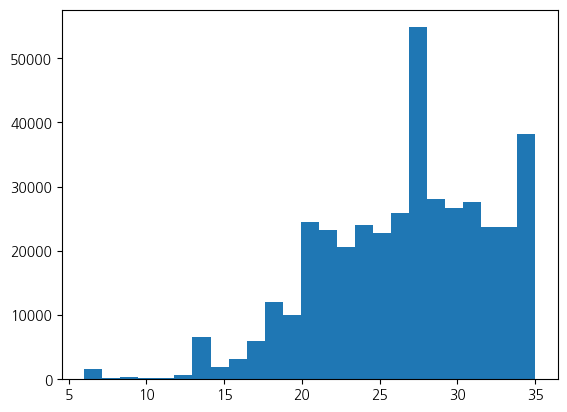

In [44]:
#상품명의 길이
print(df['Description'].str.len().describe()) 
plt.hist(df['Description'].str.len(),bins=25)
plt.show()

Description
4    161099
5    105262
3     66028
6     50416
7     13078
2      8259
1      1931
8       756
Name: count, dtype: int64


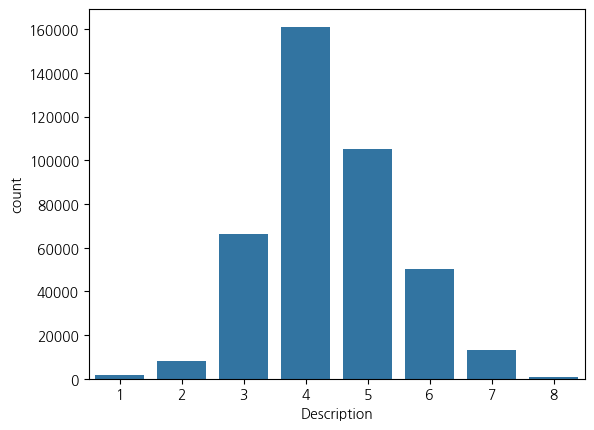

In [45]:
#상품명을 구성하는 단어 수 확인
df_Des = df['Description'].str.split()
print(df_Des.str.len().value_counts())
sns.barplot(df_Des.str.len().value_counts())
plt.show()

In [46]:
display(df[df_Des.str.len() == 8])
display(df[df_Des.str.len() == 1])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
927,536500,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,3,2010-12-01 12:35:00,2.95,17377.0,United Kingdom,0
1466,536551,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,1,2010-12-01 14:34:00,2.95,17346.0,United Kingdom,0
1487,536551,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,1,2010-12-01 14:34:00,2.95,17346.0,United Kingdom,0
2695,536698,85227,SET OF 6 3D KIT CARDS FOR KIDS,12,2010-12-02 12:28:00,0.85,15363.0,United Kingdom,0
4362,536945,85227,SET OF 6 3D KIT CARDS FOR KIDS,2,2010-12-03 12:24:00,0.85,14083.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
403417,581188,23309,SET OF 60 I LOVE LONDON CAKE CASES,24,2011-12-07 16:47:00,0.55,17735.0,United Kingdom,0
403500,581192,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,1,2011-12-07 17:05:00,3.25,15883.0,United Kingdom,0
404718,581400,23309,SET OF 60 I LOVE LONDON CAKE CASES,6,2011-12-08 13:36:00,0.55,14056.0,United Kingdom,0
404976,581405,23309,SET OF 60 I LOVE LONDON CAKE CASES,1,2011-12-08 13:50:00,0.55,13521.0,United Kingdom,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France,0
141,536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,1
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands,0
1122,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany,0
1422,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911.0,EIRE,0
...,...,...,...,...,...,...,...,...,...
406413,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,12518.0,Germany,0
406461,581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,1
406650,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany,0
406687,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany,0


8개

In [47]:
print(df[df_Des.str.len() == 8]['Description'].str.startswith('SET').value_counts()) #SET으로 시작하는 데이터가 많음
print(df['Description'].str.startswith('SET').value_counts()) #그렇다고 SET으로 시작하는 게 다 8단어는 아님

Description
True     744
False     12
Name: count, dtype: int64
Description
False    374048
True      32781
Name: count, dtype: int64


1개

In [48]:
print(df[df_Des.str.len() == 1]['StockCode'].unique())
display(df[df['StockCode'] == '62018'])

['POST' 'D' 'C2' 'M' '62018']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
6301,537140,62018,SOMBRERO,1,2010-12-05 12:53:00,1.95,12748.0,United Kingdom,0
6610,537155,62018,SOMBRERO,1,2010-12-05 13:05:00,1.95,12748.0,United Kingdom,0
12550,537844,62018,SOMBRERO,1,2010-12-08 15:17:00,1.95,17999.0,United Kingdom,0
15181,538200,62018,SOMBRERO,2,2010-12-10 11:11:00,1.95,17912.0,United Kingdom,0
26302,539762,62018,SOMBRERO,400,2010-12-22 10:29:00,1.25,13953.0,United Kingdom,0
29812,540372,62018,SOMBRERO,6,2011-01-06 16:41:00,1.95,13081.0,United Kingdom,0
45583,542371,62018,SOMBRERO,6,2011-01-27 13:29:00,1.95,12468.0,Germany,0
48515,542723,62018,SOMBRERO,26,2011-01-31 14:53:00,1.95,17256.0,United Kingdom,0
66303,544918,62018,SOMBRERO,6,2011-02-24 16:30:00,1.95,13081.0,United Kingdom,0
77240,546154,62018,SOMBRERO,400,2011-03-10 07:43:00,1.25,13953.0,United Kingdom,0


SOMBRERO
<br> 솜브레로 - 중앙이 높고 챙이 넓은 모자
<br>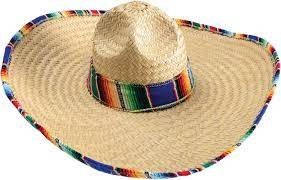

단어 수

In [49]:
#리스트형태로 저장되어있는 값들을 분해해 하나의 리스트에 저장해주는 함수(NaN때문에 float가 아니라는 조건문이 들어가 있음)
def flatten_data(data):
    return [item for sublist in data if not isinstance(sublist, float) for item in sublist]

Des_words = flatten_data(df_Des)

In [50]:
print(len(Des_words))
print(len(set(Des_words)))
set(Des_words)

1787329
2250


{'S/2',
 '0',
 'EGG',
 'DIAMANTE',
 'TIN',
 'GROW',
 'MARKET',
 'HELLO',
 'GECKO',
 'FIGURES',
 'PADS',
 'OCEAN',
 'LOVEBIRD',
 'MORRIS',
 'DISPLAY',
 '"A"',
 'NIGHT',
 'SYMPATHY',
 'CRUSOE',
 'COPPER/OLIVE',
 'MIRRORED',
 'FRUIT',
 'SPATULA',
 'PILLAR',
 'DOILY',
 'LOLITA',
 'BONBONS',
 'STUFF',
 'A4',
 'BEST',
 'DISH',
 'SOAP',
 'ENGLISH',
 'PACK',
 'BELLS',
 'NURSERY',
 'BEE',
 'DOUGHNUT',
 'FRUITBOWL',
 'M.O.P',
 '"O"',
 'ENGINE/CAR',
 'SPACEBALL',
 'HILDA',
 'CHILDHOOD',
 'FASHION',
 'S/12',
 'STICK',
 'LOOKING',
 'ANGELS',
 'CHOCOLATE',
 'DEMI',
 "YOU'RE",
 'FOOT',
 'RED/WHITE',
 'CREAM',
 'MAIL',
 'WC',
 '7',
 'TOPIARY',
 'MAIDS',
 'BLANK',
 'DAD',
 'DECORATIVE',
 'CHECK',
 'WILDFLOWER',
 'CHAMPION',
 'POLITICAL',
 'LE',
 'DOORKNOB',
 '40CM',
 'DRAWER',
 'TREE',
 'FLU',
 'GRASS',
 'BEAKER',
 'REAM',
 'MINI',
 'DIAMOND',
 'STONE/CRYSTAL',
 'POINT',
 'STRAWBRY',
 'WILLIE',
 'FLANNEL',
 'DAIRY',
 'VOTIVE',
 'BUTTERFLIES,PINK',
 'HOLE',
 'CAKE',
 'CHICKS',
 'QUARTZ',
 "'N'",
 'OF4',

### Quantity

In [51]:
print('음수인 Quantity 수',(df['Quantity'] < 0).sum())

print('취소된 주문 중 수량(Quantity)이 양수인 자료의 수:',(df[df['Cancel']==1]['Quantity'] > 0).sum())
print('성사된 주문 중 수량(Quantity)이 음수인 자료의 수:',(df[df['Cancel']==0]['Quantity'] < 0).sum())

음수인 Quantity 수 8905
취소된 주문 중 수량(Quantity)이 양수인 자료의 수: 0
성사된 주문 중 수량(Quantity)이 음수인 자료의 수: 0


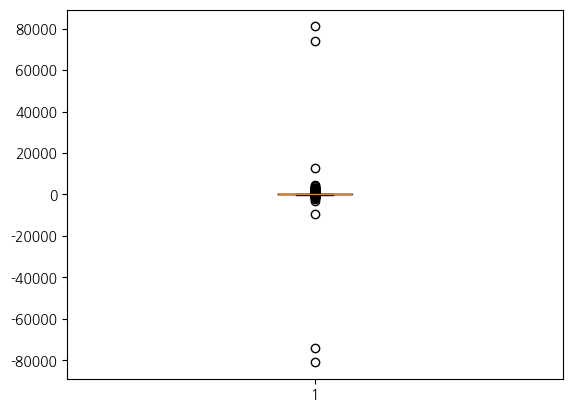

[-13.0, 27.0]


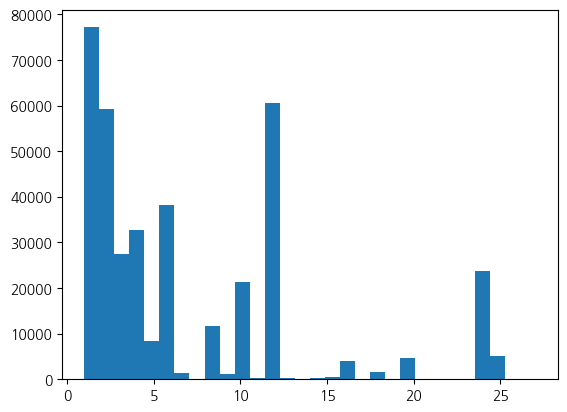

In [78]:
plt.boxplot((df['Quantity']))
plt.rcParams['axes.unicode_minus'] = False #음수에 (-)표현
plt.show()

#IQR을 기준으로 범위 내 값만 hist로 표현
Q1_Quan, Q3_Quan = df['Quantity'].quantile([0.25,0.75])
IQR_Quan =  Q3_Quan - Q1_Quan
normal_bound_Quan = [Q1_Quan-1.5*IQR_Quan, Q3_Quan + 1.5 * IQR_Quan]
print(normal_bound_Quan)

plt.hist(abs(df[(normal_bound_Quan[0] <= df['Quantity']) & (df['Quantity'] <= normal_bound_Quan[1])]['Quantity']), bins=30)
plt.rcParams['axes.unicode_minus'] = False
plt.show()

### UnitPrice

In [53]:
print('가격이 음수인 제품 수:',(df['UnitPrice'] < 0).sum())
print('가격이 0인 제품 수:',(df['UnitPrice'] == 0).sum())

가격이 음수인 제품 수: 0
가격이 0인 제품 수: 40


##### 0인 애들

In [54]:
df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
7012,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0
23071,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0
26046,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0
29881,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0
29883,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0
35460,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,0
55279,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,0
87903,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,0
95201,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,0
99945,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,0


In [55]:
print(df[df['UnitPrice']==0]['Cancel'].value_counts())
print('\n',df[df['UnitPrice']==0]['StockCode'].unique()) #M, PADS빼곤 다 상품인데
print('\n',df[df['UnitPrice']==0]['StockCode'].value_counts())

Cancel
0    40
Name: count, dtype: int64

 ['22841' '22580' '22423' '22090' '22553' '22168' '84535B' '22062' '22055'
 '22162' '22636' '47566' '22619' '22167' '22960' 'M' '23157' '23270'
 '23268' '22955' '21786' 'PADS' '22778' '21208' '23234' '22065' '22385'
 '22625' '22899' '23480' '22437' '22089' '22464' '23407' '84826']

 StockCode
M         6
22841     1
23268     1
21786     1
PADS      1
22778     1
21208     1
23234     1
22065     1
22385     1
22625     1
22899     1
23480     1
22437     1
22089     1
22464     1
23407     1
22955     1
23270     1
22580     1
23157     1
22960     1
22167     1
22619     1
47566     1
22636     1
22162     1
22055     1
22062     1
84535B    1
22168     1
22553     1
22090     1
22423     1
84826     1
Name: count, dtype: int64


In [56]:
display(df[df['StockCode'] == '22841'])
display(df[(df['StockCode'] == '22841')&(df['Country']=='Germany')])
print(df[df['StockCode'] == '22841']['UnitPrice'].value_counts())
print(df[df['StockCode'] == '22841']['Country'].value_counts()) #국가마다 가격이 살짝 다른듯한데.. 독일은 무료행사 같은건가

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
2774,536738,22841,ROUND CAKE TIN VINTAGE GREEN,2,2010-12-02 13:06:00,7.95,15827.0,United Kingdom,0
3906,536844,22841,ROUND CAKE TIN VINTAGE GREEN,2,2010-12-02 18:49:00,7.95,14236.0,United Kingdom,0
4123,536859,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-03 10:43:00,7.95,12841.0,United Kingdom,0
7012,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.00,12647.0,Germany,0
7253,537207,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 15:06:00,7.95,17402.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
379296,578858,22841,ROUND CAKE TIN VINTAGE GREEN,1,2011-11-27 11:22:00,7.95,18145.0,United Kingdom,0
380435,578946,22841,ROUND CAKE TIN VINTAGE GREEN,1,2011-11-27 13:47:00,7.95,16005.0,United Kingdom,0
384895,579387,22841,ROUND CAKE TIN VINTAGE GREEN,1,2011-11-29 12:06:00,7.95,14452.0,United Kingdom,0
389689,580021,22841,ROUND CAKE TIN VINTAGE GREEN,2,2011-12-01 11:43:00,7.95,14047.0,United Kingdom,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
7012,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0


UnitPrice
7.95     196
6.95       9
5.49       2
15.79      2
0.00       1
Name: count, dtype: int64
Country
United Kingdom        190
EIRE                    6
Australia               2
Switzerland             2
France                  2
European Community      2
Spain                   2
Germany                 1
Greece                  1
Cyprus                  1
Unspecified             1
Name: count, dtype: int64


In [57]:
# 0인 애들의 UnitPrice가 몇 종류인지
UnitP_0 = df[df['StockCode'].isin(df[df['UnitPrice']==0]['StockCode'].unique())].loc[:,['StockCode','UnitPrice']]
UnitP_0[~UnitP_0.duplicated()].groupby('StockCode').count().sort_values(by='UnitPrice') #일단 한종류인건 없음. -> 대체가능

,UnitPrice
StockCode,
PADS,2
22162,2
22553,3
22437,3
23270,3
22636,3
22167,3
22168,3
22089,3


In [58]:
display(df[df['StockCode'] == 'PADS'])
display(df[df['StockCode'] == '22162'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
110121,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,0
199246,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,0
262429,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.000,16133.0,United Kingdom,0
263645,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
3919,536845,22162,HEART GARLAND RUSTIC PADDED,1,2010-12-02 19:18:00,2.95,17961.0,United Kingdom,0
8967,537381,22162,HEART GARLAND RUSTIC PADDED,8,2010-12-06 13:13:00,2.95,14667.0,United Kingdom,0
21408,539015,22162,HEART GARLAND RUSTIC PADDED,16,2010-12-15 13:38:00,2.95,15822.0,United Kingdom,0
36829,541262,22162,HEART GARLAND RUSTIC PADDED,1,2011-01-16 15:50:00,2.95,18069.0,United Kingdom,0
42239,541950,22162,HEART GARLAND RUSTIC PADDED,8,2011-01-24 12:13:00,2.95,15498.0,United Kingdom,0
54267,543463,22162,HEART GARLAND RUSTIC PADDED,1,2011-02-08 14:06:00,2.95,15311.0,United Kingdom,0
57454,543973,22162,HEART GARLAND RUSTIC PADDED,2,2011-02-14 15:15:00,2.95,17571.0,United Kingdom,0
58263,544062,22162,HEART GARLAND RUSTIC PADDED,3,2011-02-15 13:19:00,2.95,15311.0,United Kingdom,0
64221,544677,22162,HEART GARLAND RUSTIC PADDED,1,2011-02-22 16:13:00,2.95,18196.0,United Kingdom,0
95730,548388,22162,HEART GARLAND RUSTIC PADDED,8,2011-03-30 16:52:00,2.95,13268.0,United Kingdom,0


##### histogram

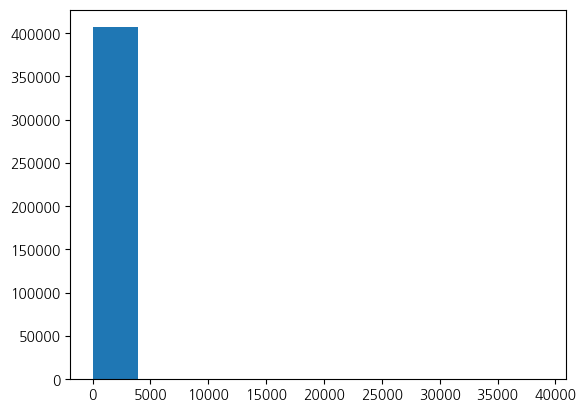

[-2.5, 7.5]


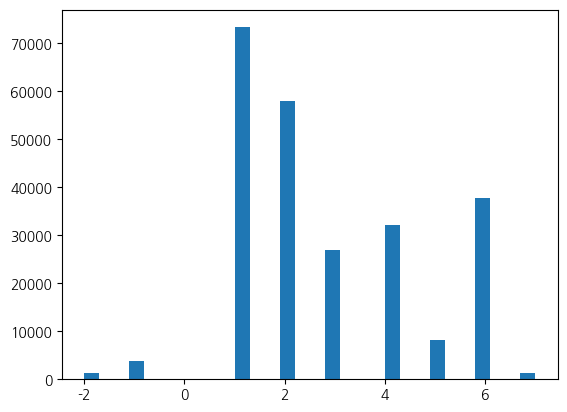

In [59]:
plt.hist(df['UnitPrice'])
plt.rcParams['axes.unicode_minus'] = False
plt.show()

Q1_pr, Q3_pr = df['UnitPrice'].quantile([0.25,0.75])
IQR_pr =  Q3_pr - Q1_pr
normal_bound_pr = [Q1_pr-1.5*IQR_pr, Q3_pr + 1.5 * IQR_pr]
print(normal_bound_pr)

plt.hist(df[(normal_bound_pr[0] <= df['Quantity']) & (df['Quantity'] <= normal_bound_pr[1])]['Quantity'],bins=30)
plt.rcParams['axes.unicode_minus'] = False
plt.show()

### CustomerID

In [60]:
print('고객 수:',len(df['CustomerID'].unique()))

고객 수: 4372


In [61]:
#고객당 주문 횟수
df[~df.loc[:,['CustomerID','InvoiceNo']].duplicated()].loc[:,['CustomerID','InvoiceNo']].groupby('CustomerID').count().sort_values(by='InvoiceNo',ascending=False)

,InvoiceNo
CustomerID,
14911.0,248
12748.0,224
17841.0,169
14606.0,128
13089.0,118
...,...
13877.0,1
16400.0,1
13878.0,1


### Country

In [62]:
set(df_origin[df_origin['CustomerID'].isna()]['Country'].unique()) - set(df['Country']) #홍콩이 날아갔네

{'Hong Kong'}

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


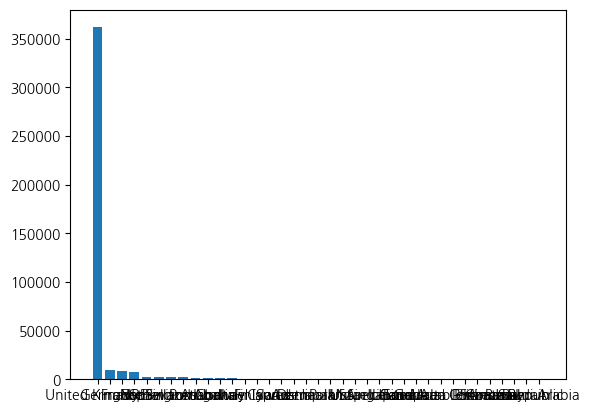

United Kingdom이 차지하는 비율: 0.89


In [63]:
print(df['Country'].value_counts())
print('\n국가 수:',len(df['Country'].unique()))

plt.bar(df['Country'].value_counts().index, df['Country'].value_counts())
plt.show()

print('United Kingdom이 차지하는 비율:',np.round(df['Country'].value_counts()[0]/len(df['Country']),3))

In [85]:
df_origin.loc[:,['StockCode', 'Description', 'UnitPrice', 'CustomerID', 'Country']].duplicated().sum()

251703

In [94]:
tmp = pd.concat([abs(df['Quantity']),df.loc[:,['StockCode', 'Description', 'UnitPrice', 'CustomerID', 'Country']]],axis=1)
tmp['StockCode'] = tmp['StockCode'].astype(str)
tmp2 = tmp[tmp.duplicated()]
tmp2[~tmp2.duplicated()].sort_values(by='StockCode')

,Quantity,StockCode,Description,UnitPrice,CustomerID,Country
97195,120,10002,INFLATABLE POLITICAL GLOBE,0.85,12731.0,France
28366,12,10002,INFLATABLE POLITICAL GLOBE,0.85,12682.0,France
326131,24,10080,GROOVY CACTUS INFLATABLE,0.39,16607.0,United Kingdom
394405,6,10120,DOGGY RUBBER,0.21,16931.0,United Kingdom
95034,1,10120,DOGGY RUBBER,0.21,16657.0,United Kingdom
...,...,...,...,...,...,...
231325,1,POST,POSTAGE,15.00,17315.0,United Kingdom
269459,3,POST,POSTAGE,18.00,12615.0,France
384485,1,POST,POSTAGE,40.00,12375.0,Finland
138726,2,POST,POSTAGE,18.00,12553.0,France
